# Module 2: Exploration data analysis of train a model by given attributes

In [1]:
#import libraries for access and functional purpose
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [3]:
#read the given dataset
df = p.read_csv("dataset.csv")

In [5]:
df.head()

,Unnamed: 0,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,Class
0,0,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,1
1,1,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,0
2,2,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,0
3,3,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0
4,4,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,1


Text(0, 0.5, 'Strength values')

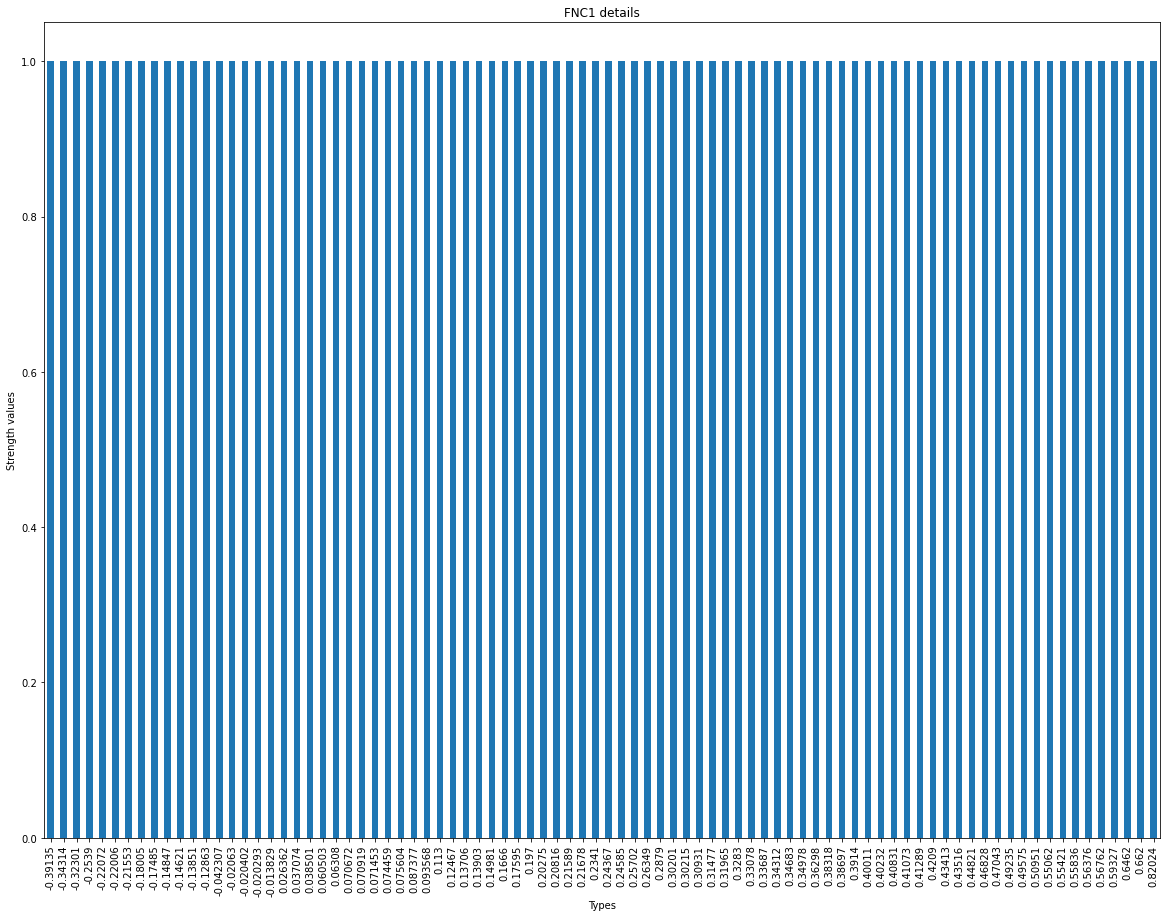

In [6]:
count_classes = p.value_counts(df['FNC1'], sort = True).sort_index()
count_classes.plot(kind = 'bar', figsize=(20,15))
plt.title("FNC1 details")
plt.xlabel("Types")
plt.ylabel("Strength values")

Text(0.5, 1.0, 'FNC1 VALUES')

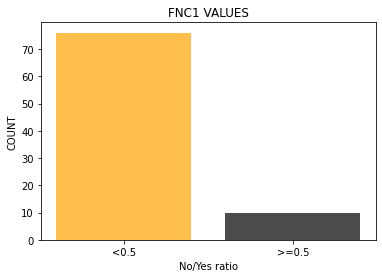

In [11]:

no=sum(df['FNC1'] <0.5)
yes=sum(df['FNC1']>=0.5)
colors=['orange','black']
locations=[1,2]
heights=[no,yes]
labels=['<0.5','>=0.5']
plt.bar(locations,heights,color=colors,tick_label=labels,alpha=0.7)
plt.xlabel('No/Yes ratio')
plt.ylabel('COUNT')
plt.title('FNC1 VALUES')

Text(0.5, 1.0, 'FNC2 VALUES')

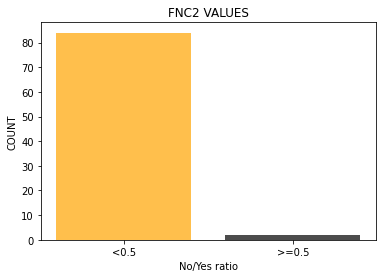

In [12]:

no=sum(df['FNC2'] <0.5)
yes=sum(df['FNC2']>=0.5)
colors=['orange','black']
locations=[1,2]
heights=[no,yes]
labels=['<0.5','>=0.5']
plt.bar(locations,heights,color=colors,tick_label=labels,alpha=0.7)
plt.xlabel('No/Yes ratio')
plt.ylabel('COUNT')
plt.title('FNC2 VALUES')

Text(0.5, 1.0, 'Confirmed and non confirmed Disease Patients')

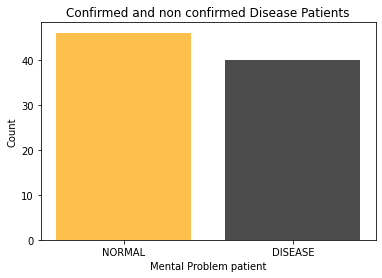

In [13]:

no=sum(df['Class']==0)
yes=sum(df['Class']==1)
colors=['orange','black']
locations=[1,2]
heights=[no,yes]
labels=['NORMAL','DISEASE']
plt.bar(locations,heights,color=colors,tick_label=labels,alpha=0.7)
plt.xlabel('Mental Problem patient')
plt.ylabel('Count')
plt.title('Confirmed and non confirmed Disease Patients')

Text(0.5, 1.0, 'FNC1 Values')

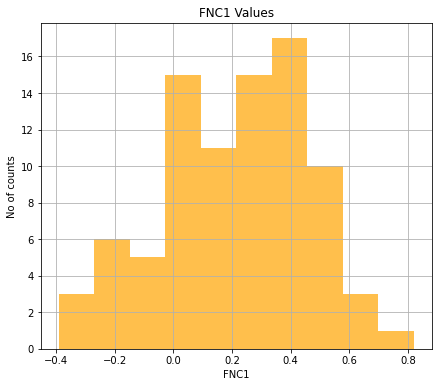

In [14]:
df['FNC1'].hist(figsize=(7,6), color='orange', alpha=0.7)
plt.xlabel('FNC1')
plt.ylabel('No of counts')
plt.title('FNC1 Values')

Text(0.5, 1.0, 'FNC2 Values')

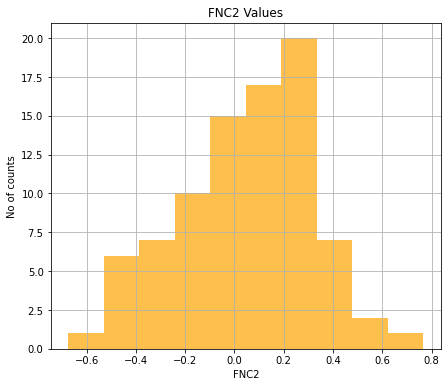

In [15]:
df['FNC2'].hist(figsize=(7,6), color='orange', alpha=0.7)
plt.xlabel('FNC2')
plt.ylabel('No of counts')
plt.title('FNC2 Values')

<AxesSubplot:>

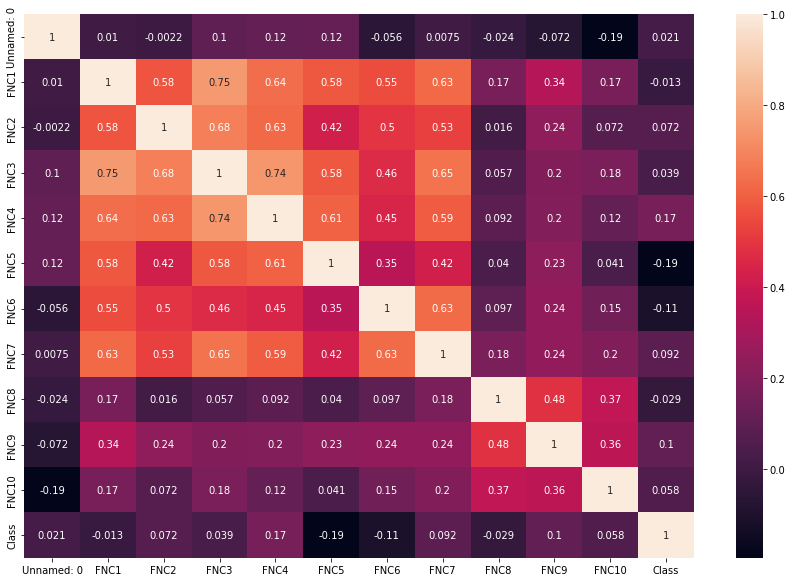

In [16]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,10))
s.heatmap(df.corr(), ax=ax, annot=True)

<AxesSubplot:title={'center':'FNC1'}, xlabel='Class'>

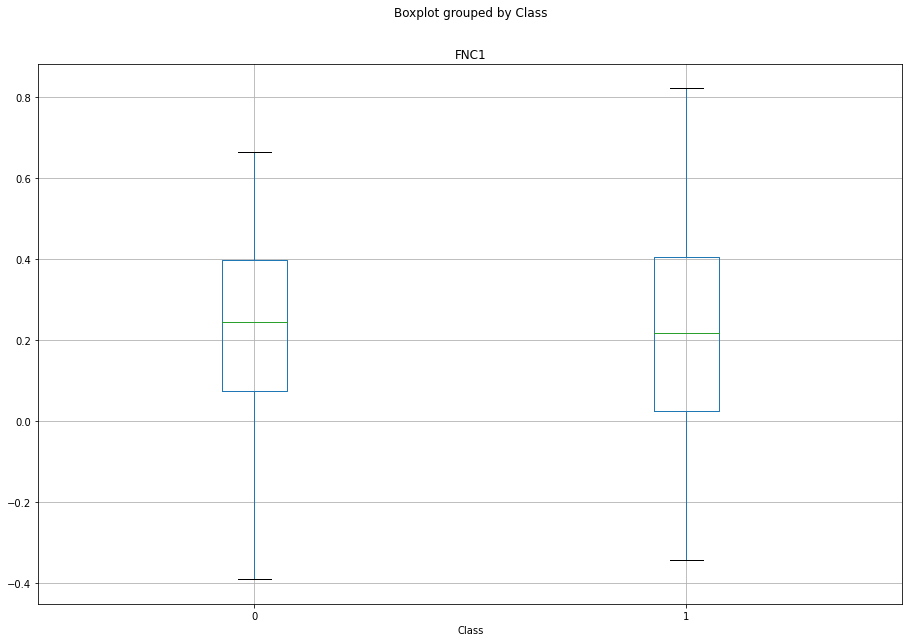

In [17]:
df.boxplot(column="FNC1", by="Class", figsize=(15,10))

 0.343120    1.16
 0.593270    1.16
 0.319650    1.16
 0.470430    1.16
 0.137060    1.16
             ... 
 0.434130    1.16
-0.042307    1.16
-0.215530    1.16
-0.020293    1.16
 0.257020    1.16
Name: FNC1, Length: 86, dtype: float64

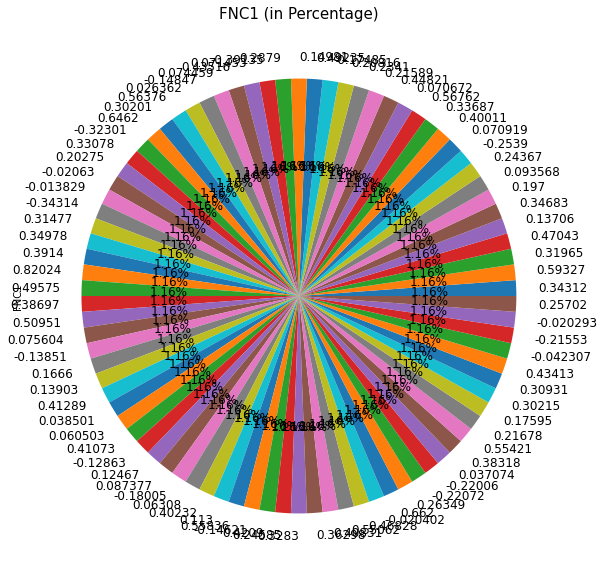

In [18]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' (in Percentage)', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'FNC1')

0    53.49
1    46.51
Name: Class, dtype: float64

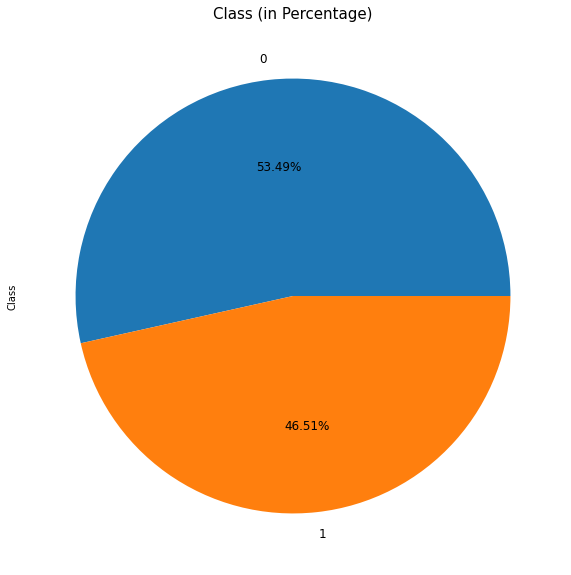

In [19]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' (in Percentage)', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)


PropByVar(df, 'Class')

In [21]:

def y_No_y_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["Class"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Attack Prediction Vs No Attack Prediction (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Class,0,1
FNC1,,
-0.39135,100.0,0.0
-0.34314,0.0,100.0
-0.32301,100.0,0.0
-0.25390,0.0,100.0
-0.22072,100.0,0.0
...,...,...
0.56762,0.0,100.0
0.59327,100.0,0.0
0.64620,0.0,100.0


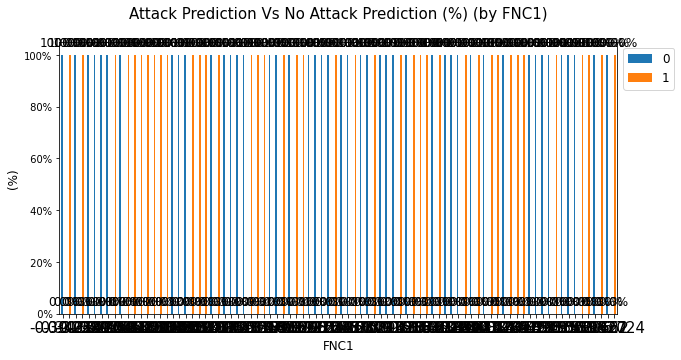

In [22]:
y_No_y_bar_plot(df, 'FNC1')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Class,0,1
FNC2,,
-0.67389,100.0,0.0
-0.50034,0.0,100.0
-0.46863,0.0,100.0
-0.45715,100.0,0.0
-0.43638,100.0,0.0
...,...,...
0.41872,100.0,0.0
0.44471,0.0,100.0
0.49452,0.0,100.0


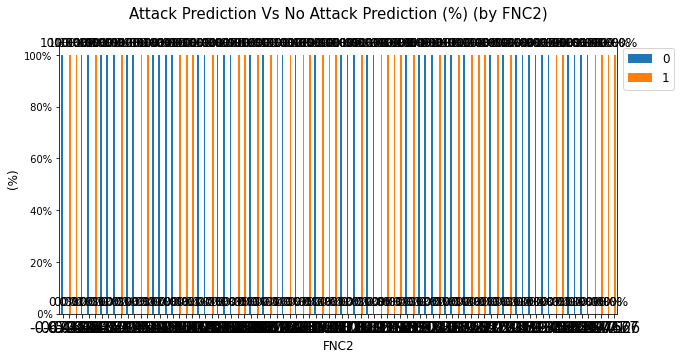

In [23]:
y_No_y_bar_plot(df, 'FNC2')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Class,0,1
FNC10,,
-0.43450,100.0,0.0
-0.30950,0.0,100.0
-0.26886,100.0,0.0
-0.26102,0.0,100.0
-0.24819,0.0,100.0
...,...,...
0.48986,100.0,0.0
0.49175,100.0,0.0
0.51344,0.0,100.0


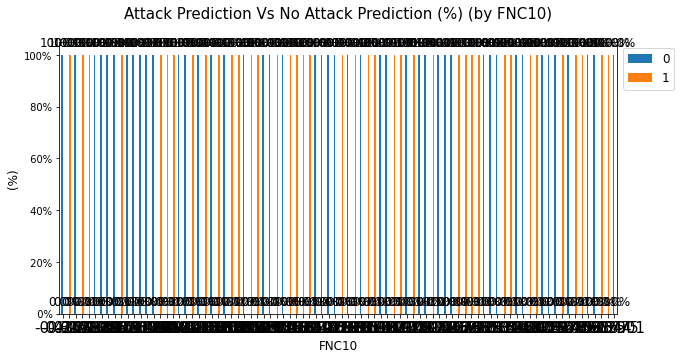

In [24]:
y_No_y_bar_plot(df, 'FNC10')